# Intro to Astropy

## Importing astropy

You could import all of astropy, which is a huge, huge library, but it is not recommended! Ideally you import a subpackage or a class within the subpackage that is relevant to the operations of the script at hand, which is what we'll be doing in the rest of the notebook

## Quantities

First go through the slides for an introduction, and then attempt the following problem:

Calculate the gravitational force between a 3 solar mass star and its 10 Jupiter mass planet 2 au away. 

In [1]:
# import the subpackages to save quantities as objects with units and have pre-defined constants
import astropy.units as u
import astropy.constants as c

### Examples with astropy.units

In [3]:
# create a velocity 
q = 15.1 * u.meter / (32.0 * u.second)
print(q.value)
print(q.unit)  # m/s

0.471875
m / s


In [4]:
# create convert units
x = 1.0 * u.parsec
x.to(u.km)  # to ile uzaklığı km cinsine çevirebiliyoruz

<Quantity 3.08567758e+13 km>

### Examples with astropy.constants

In [5]:
# what does a constant object entail?
print(c.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


### DIY

$$ F = G \frac{m_1 m_2}{r^2} $$


In [6]:
#masses with units of M_sun and M_jub
from astropy.constants import G, M_sun, M_jup

#distance with unit of au
from astropy.units import au

#Calculate gravitational force using masses distance and the gravitational constant G
def gravitational_force(m1_sun, m2_jup, distance_au):
    # Kütleleri ve mesafeyi Astropy birimlerine çevir
    m1 = m1_sun * M_sun
    m2 = m2_jup * M_jup
    distance = distance_au * au
    
    # Yerçekimsel kuvveti hesapla
    force = G * (m1 * m2) / distance**2
    
    
    return force.to('N')  # Newton cinsinden sonucu döndür



m1 = 1  # Güneş kütlesi cinsinden
m2 = 1  # Jüpiter kütlesi cinsinden
distance = 1  # Astronomik birim cinsinden


"""
Güneş kütlesi (M_sun): Yaklaşık 1.989 × 10^30 kg
Jüpiter kütlesi (M_jup): Yaklaşık 1.898 × 10^27 kg
"""

force = gravitational_force(m1, m2, distance)
print(f"The gravitational force is {force}")

The gravitational force is 1.1256037390062935e+25 N


## Input and Output

### Tables

Look at the slide for information

### FITS

In [7]:
# import i/o subpackage for reading FITS files
from astropy.io import fits

# Get path for data that came with astropy installation
fits_img_fn = fits.util.get_testdata_filepath('test0.fits')

# open HDU object for file and see what it contains
hdul = fits.open(fits_img_fn) # header data unit (HDU) list
hdul.info()

Filename: c:\Users\Sabri\anaconda3\Lib\site-packages\astropy\io\fits\tests\data\test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [8]:
fits_img_fn

'c:\\Users\\Sabri\\anaconda3\\Lib\\site-packages\\astropy\\io\\fits\\tests\\data\\test0.fits'

In [9]:
# what does the data look like? how do you "get data" from the file?

# fits.getdata

# hdul[1].data


## Planning Observations

Planning observations takes into account the targets, dates and times, location of observing, moon cycle, etc.

### Example: Looking at Fomalhaut

Here's a simple start-- You have to plan an observation of Fomalhaut from Subaru.

#### Step 1:  
The first step is to generate the coordinates of the star and the observing site. The packages here are a hint


In [10]:
# !pip install astroplan  # if you need installing

In [11]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroplan import Observer

# get coordinates of fomalhaut

# get observatory info and store its coordinates as an EarthLocation

#### Step 2:

Visualise and plot its visibility on a date of your choice

In [12]:
fomalhaut = SkyCoord.from_name('Fomalhaut')
subaru = Observer.at_site('Subaru', timezone ='US/Hawaii')
subaru_loc = EarthLocation(lat=subaru.latitude, lon=subaru.longitude)
print(f'Sky Coords of Fomalhaut: {fomalhaut} and Geocentric Coords of Subaru: {subaru_loc}')

Sky Coords of Fomalhaut: <SkyCoord (ICRS): (ra, dec) in deg
    (344.41269272, -29.62223703)> and Geocentric Coords of Subaru: (-5460925.6854608, -2491437.49064199, 2149539.83199706) m


In [13]:
# determine position for a give date: Let's say Jul 31 2024
from astropy.time import Time
# coz you'll need this
import numpy as np

# define midnight 
midnight = Time('2024-07-31 00:00:00')
# Define grid of times to calculate position over:
delta_midnight = np.linspace(-12, 12, 1000)*u.hour 
times = midnight + delta_midnight

# Set up AltAz reference frame for these times and location
frame= AltAz(obstime=times, location=subaru_loc)

# Now we transform the Fomalhaut object to the Altitute/Azimuth coordinate system
fomalhaut_altaz = fomalhaut.transform_to(frame)

In [14]:
# now... can we see this source at night? this would depend on where the sun is
from astropy.coordinates import get_sun

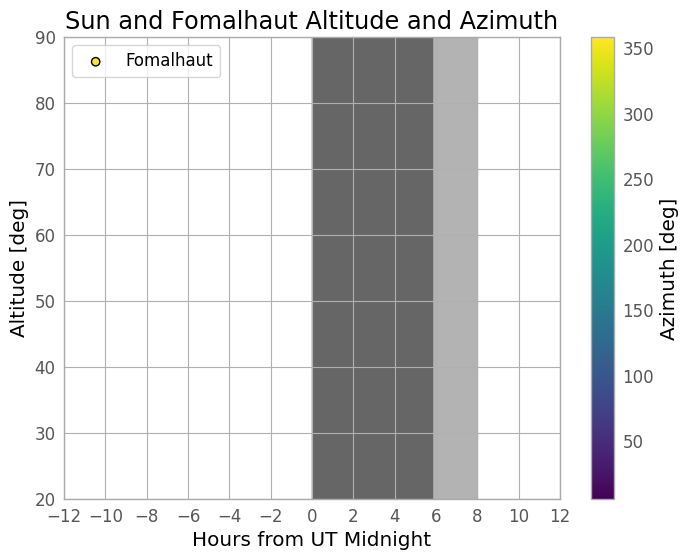

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import AltAz, get_sun, EarthLocation
from astropy.time import Time

# Set the plotting style
plt.style.use(astropy_mpl_style)

# Define time and location
times = Time('2023-01-01T00:00:00') + np.linspace(0, 24, 100) * u.hour
location = EarthLocation.of_site('greenwich')
altaz_frame = AltAz(obstime=times, location=location)

# Calculate Sun's altitude and azimuth
sun = get_sun(times)
sun_altaz = sun.transform_to(altaz_frame)

# Convert Time to hours
times_in_hours = (times - Time('2023-01-01T00:00:00')).to(u.hour).value

# Plot the sun altitude
plt.figure()

# Plot the range when the sun is below the horizon, and at least 18 degrees below
plt.fill_between(times_in_hours, 0, 90,
                 where=sun_altaz.alt < 0 * u.deg, color='0.7', zorder=0)
plt.fill_between(times_in_hours, 0, 90,
                 where=sun_altaz.alt < -18 * u.deg, color='0.4', zorder=0)

# For Fomalhaut's altitude/azimuth plot
# Note: Fomalhaut's coordinates and altitude/azimuth calculation would be similar to the Sun's
# You need to compute Fomalhaut's coordinates here. Example assumes similar calculations as the Sun.
fomalhaut = get_sun(times)  # Replace with Fomalhaut's coordinates
fomalhaut_altaz = fomalhaut.transform_to(altaz_frame)

# Scatter plot of Fomalhaut's azimuth
plt.scatter(times_in_hours, fomalhaut_altaz.alt, c=fomalhaut_altaz.az, cmap='viridis', label='Fomalhaut', edgecolor='k')

# Details
plt.colorbar(label='Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 14, 2))
plt.ylim(20, 90)
plt.xlabel('Hours from UT Midnight')
plt.ylabel('Altitude [deg]')
plt.title('Sun and Fomalhaut Altitude and Azimuth')
plt.show()
